# Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generating data 


## Function to be fitted

In [2]:
def function(x):
  y = x*np.sin(.5*x*np.sin(.5*x*np.cos(x)))
  return y
vf = np.vectorize(function)

### Plot the function

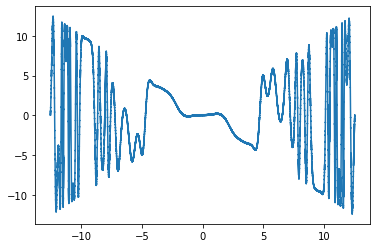

In [3]:
init = -4*np.pi
endval = 4*np.pi
step = .00005
x = np.arange(init,endval+step,step)
y = vf(x) + .1*np.random.rand(np.size(x))
plt.plot(x,y)

## Randomizing and divinding data into test and train sets

In [4]:
p = np.random.permutation(len(x)) # Create a random permutation 
x_perm = x[p]
y_perm = y[p] # Aplling same permutation on both

### Plotting to see if nothing changed (sceptical people go :D )

In [5]:
#plt.plot(x,y)
#plt.plot(x_perm,y_perm,',r')

### Train set and test set, train set is 80% of the data

In [6]:
x_train_full , x_test , y_train_full, y_test = x_perm[:int(np.floor(.8*len(x)))], x_perm[int(np.floor(.8*len(x))):], y_perm[:int(np.floor(.8*len(x)))], y_perm[int(np.floor(.8*len(x))):]

#### Since all the training data is mixed the plot is the same (except for the blank spots)

In [7]:
#plt.plot(x_train_full,y_train_full,',r')

In [8]:
#plt.plot(x_test,y_test,',b')

### Validation and training set

In [9]:
x_train, x_valid, y_train, y_valid = x_train_full[:int(np.floor(.8*len(x)))], x_train_full[int(np.floor(.8*len(x))):], y_train_full[:int(np.floor(.8*len(x)))], y_train_full[int(np.floor(.8*len(x))):]

# Making the DNN 

#### Using keras functional api to construct the the  problem
#### Unsing wide and deep neural net

In [10]:
input_ = keras.layers.Input(shape=(1,))
hidden1 = keras.layers.Dense(10, activation="tanh")(input_)
hidden2 = keras.layers.Dense(10, activation="tanh")(hidden1)
hidden3 = keras.layers.Dense(10, activation="tanh")(hidden2)
hidden4 = keras.layers.Dense(10, activation="tanh")(hidden3)
concat = keras.layers.Concatenate()([input_,hidden4,hidden3,hidden2])
hidden5 = keras.layers.Dense(30, activation="tanh")(concat)
hidden6 = keras.layers.Dense(10, activation="tanh")(hidden5)
output = keras.layers.Dense(1)(hidden6)
model = keras.Model(inputs=[input_], outputs=[output])

## Compiling the DNN

In [11]:
model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999))

## Fitting the DNN

In [12]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Found GPU at: {}'.format(device_name))
  with tf.device(device_name):
    history = model.fit(x_train,y_train, epochs=20, validation_data=(x_valid,y_valid))
else:
  history = model.fit(x_train,y_train, epochs=20, validation_data=(x_valid,y_valid))

Found GPU at: 
Epoch 1/20
12567/12567 [==============================] - 9s 703us/step - loss: 22.8375
Epoch 2/20
12567/12567 [==============================] - 9s 684us/step - loss: 17.3570
Epoch 3/20
12567/12567 [==============================] - 9s 695us/step - loss: 16.2575
Epoch 4/20
12567/12567 [==============================] - 9s 679us/step - loss: 15.3285
Epoch 5/20
12567/12567 [==============================] - 9s 680us/step - loss: 13.6192
Epoch 6/20
12567/12567 [==============================] - 9s 683us/step - loss: 13.8575
Epoch 7/20
12567/12567 [==============================] - 9s 688us/step - loss: 16.4316
Epoch 8/20
12567/12567 [==============================] - 9s 680us/step - loss: 15.6506
Epoch 9/20
12567/12567 [==============================] - 9s 701us/step - loss: 14.0182
Epoch 10/20
12567/12567 [==============================] - 9s 685us/step - loss: 13.0154
Epoch 11/20
12567/12567 [==============================] - 9s 706us/step - loss: 13.1868
Epoch 12/20
125

In [13]:
mse_test = model.evaluate(x_test, y_test)

3142/3142 [==============================] - 1s 415us/step - loss: 11.4495


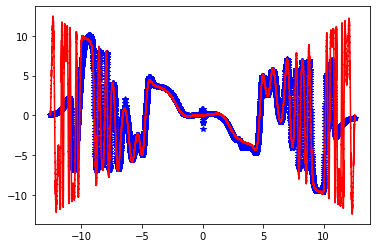

In [14]:
x_new = np.arange(init,endval+step*100,step*100)
y_new = model.predict(x_new)
plt.plot(x_new,y_new,'*b')
plt.plot(x,y,'r')